In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, f, multivariate_normal, norm
import numpy as np
import statsmodels.api as sm
from Linear_Reg_Diagnostic import Linear_Reg_Diagnostic
import statsmodels.stats.outliers_influence as smoi
from statsmodels.graphics.api import interaction_plot, qqplot
from statsmodels.stats.anova import anova_lm


In [2]:
asthma = pd.read_csv("http://stats191.stanford.edu/data/asthma.table",  delim_whitespace=True)


In [3]:
asthma

,T,P,Y
0,56,38,3
1,57,39,2
2,58,72,2
3,60,43,1
4,61,39,1
5,62,44,4
6,65,48,0
7,66,60,2
8,68,63,4
9,67,57,1


In [4]:
asthma_model = sm.OLS.from_formula('Y ~ T + P', asthma).fit()
print(asthma_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     4.684
Date:                Tue, 16 May 2023   Prob (F-statistic):             0.0179
Time:                        13:10:38   Log-Likelihood:                -54.446
No. Observations:                  30   AIC:                             114.9
Df Residuals:                      27   BIC:                             119.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4854      2.610     -1.336      0.1

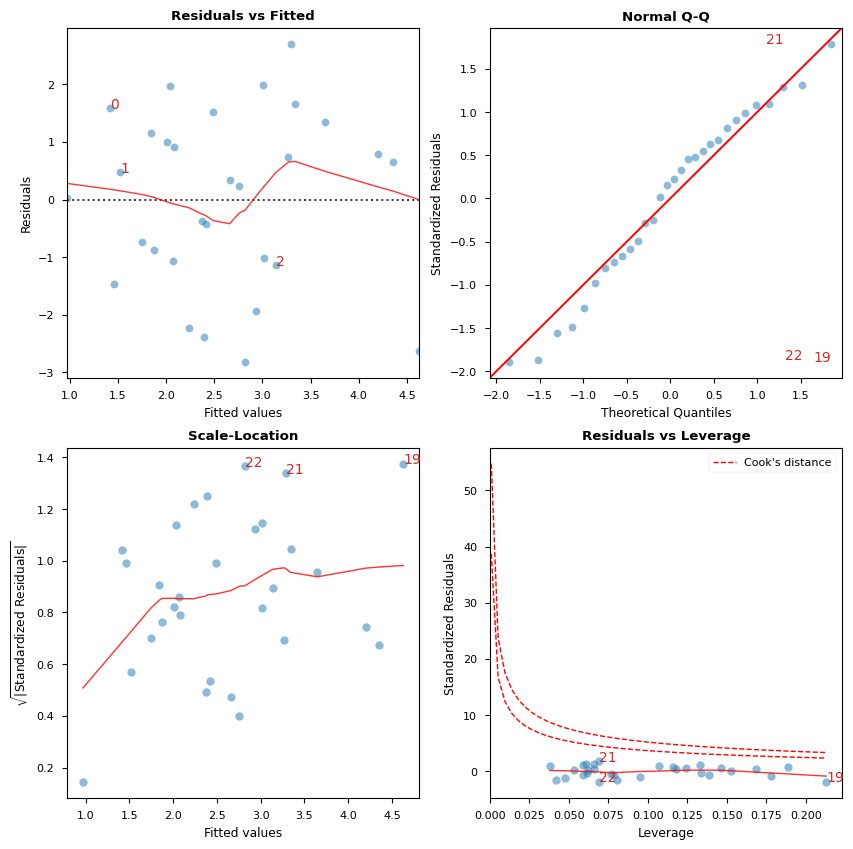

    Features  VIF Factor
1          T        1.00
2          P        1.00
0  Intercept       83.29


In [5]:
cls = Linear_Reg_Diagnostic(asthma_model)
fig, ax = cls()

constant varience seems reasonable.

sol 3:

In [6]:
weights = 1 / asthma_model.fittedvalues
w_asthma_model = sm.WLS.from_formula('Y ~ T + P', data = asthma, weights = weights).fit()

In [7]:
w_asthma = sm.WLS.from_formula('Y ~ T + P', data = asthma, weights = weights)

sol 4:

In [8]:
# arrr
cls = Linear_Reg_Diagnostic(w_asthma_model)


AttributeError: 'RegressionResults' object has no attribute 'get_influence'

sol 5:

In [ ]:
w_asthma_model.pvalues

Intercept    0.188034
T            0.135115
P            0.013220
dtype: float64

T is not correlated, P is.